# Tratamento de dados - Detecção de Anomalias

Trabalharemos nesse exemplo com um dataset de gorgetas fornecido pela biblioteca Seaborn. Outros exemplos de datasets podem ser encontrados no link: [Datasets Seaborn](https://github.com/mwaskom/seaborn-data)

In [45]:
#Importação de bibliotecas
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
# Leitura dos dados do dataset
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

## Visualizando informações importantes sobre o Dataset

In [3]:
# Descrição dos campos e tipos (Total da conta, gorgeta, sexo, fumante, dia, hora (almoço/jantar), tamanho)
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


## Tratamento de dados

Vamos verificar quais e quantas colunas estão nulas/vazias:

In [4]:
# Visualização das colunas que se encontram vazias/nulas e a quantidade de linhas que possuem esses valores vazios
tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

Não há colunas vazias nesse exemplo, ótimo, podemos prosseguir:

### Visualizando os valores anômalos

Para visualizar e identificar os dados anômalos, usaremos o diagrama de caixas, ou **boxplot**. Através desse diagrama conseguimos ver o quão distante da média e dos limites esse valor se encontra:

In [5]:
%%html
<img src="images/boxplot.png",width=10,height=10>

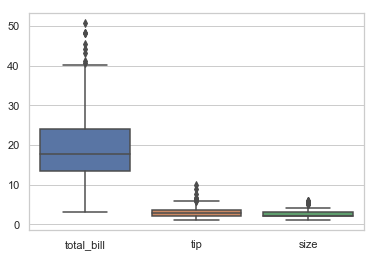

In [6]:
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=tips);

Com esse gráfico, o boxplot, podemos perceber que em todas as colunas numéricas existem valores muito acima do limite superior, ou seja, são **discrepantes** <br>
Para estudar essas discrepâncias, precisamos seguir alguns passos:

### Vamos trabalhar primeiro com o valor total da conta (total_bill):

In [7]:
total = np.array(tips['total_bill'])

**1º Passo -** Encontrar o valor da média dos dados:

In [8]:
media = np.mean(total, axis=0) 
media

19.78594262295082

**2º Passo -** Encontrar o valor do desvio padrão dos dados:

In [9]:
desvio_padrao = np.std(total, axis=0) #Somente 1 coluna = axis 0
desvio_padrao

8.884150577771132

**Definição de regras para considerar o valor como anômalo:** Para ser anômalo, o valor deve ser menor que (media - 2 * desvio_padrao )  e deve ser maior que (media + 2 * desvio_padrao ), o intervalo entre esses valores são os valores válidos:

- Definição da fronteira menor: Valor mínimo permitido

In [10]:
fronteira_menor = (media - (2 * desvio_padrao))
fronteira_menor

2.0176414674085557

- Definição da fronteira maior: Valor máximo permitido

In [11]:
fronteira_maior = (media + (2 * desvio_padrao))
fronteira_maior

37.55424377849309

Vamos quantificar agora os valores que estão abaixo da fronteira menor:

In [12]:
print('Quantidade de valores abaixo da fronteira menor: {}'.format(len(total[total < fronteira_menor])))

Quantidade de valores abaixo da fronteira menor: 0


Vamos quantidicar os valores que estão acima da fronteira maior:

In [13]:
print('Quantidade de valores acima da fronteira maior: {}'.format(len(total[total > fronteira_maior])))

Quantidade de valores acima da fronteira maior: 14


Esse problema pode ser resolvido de três formas:
- Substituir os valores acima/abaixo das fronteiras pela média <br>
- Calcular esses valores com alguma fórmula como a fórmula de Mahalanobis, que calcula a distância de um ponto p a uam distribuição multivariada por exemplo, e substituir os valores anômalos pelo da distância.
- Remover esses valores

Nesse caso iremos utilizar a segunda solução mais fácil e mais viável para o problema, que é substituir esses valores pela média, pois trata-se de muitos valores a serem excluídos, o que poderia onerar bastante a base:

In [14]:
# Cálculo da média
media = np.mean(total)
media

19.78594262295082

In [15]:
# Preenchimento dos valores maiores que a fronteira_maior com a média
total[total > fronteira_maior] = media

In [16]:
# Preenchimento dos valores menores que a fronteira_menor com a média
total[total < fronteira_menor] = media

In [17]:
# Atualizar no dataset
tips['total_bill'] = total

Agora plotaremos novamente o boxplot para visualizar sua distribuição:

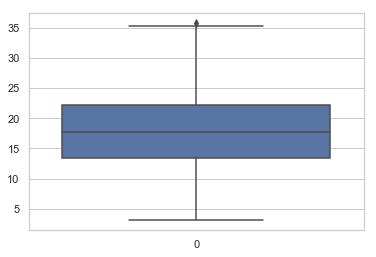

In [18]:
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=total);

In [19]:
total

array([16.99      , 10.34      , 21.01      , 23.68      , 24.59      ,
       25.29      ,  8.77      , 26.88      , 15.04      , 14.78      ,
       10.27      , 35.26      , 15.42      , 18.43      , 14.83      ,
       21.58      , 10.33      , 16.29      , 16.97      , 20.65      ,
       17.92      , 20.29      , 15.77      , 19.78594262, 19.82      ,
       17.81      , 13.37      , 12.69      , 21.7       , 19.65      ,
        9.55      , 18.35      , 15.06      , 20.69      , 17.78      ,
       24.06      , 16.31      , 16.93      , 18.69      , 31.27      ,
       16.04      , 17.46      , 13.94      ,  9.68      , 30.4       ,
       18.29      , 22.23      , 32.4       , 28.55      , 18.04      ,
       12.54      , 10.29      , 34.81      ,  9.94      , 25.56      ,
       19.49      , 19.78594262, 26.41      , 11.24      , 19.78594262,
       20.29      , 13.81      , 11.02      , 18.29      , 17.59      ,
       20.08      , 16.45      ,  3.07      , 20.23      , 15.01

### Agora trabalharemos com a gorgeta (tip):

In [20]:
tip = np.array(tips['tip'])

**1º Passo -** Encontrar o valor da média dos dados:

In [21]:
media = np.mean(tip, axis=0) 
media

2.99827868852459

**2º Passo -** Encontrar o valor do desvio padrão dos dados:

In [22]:
desvio_padrao = np.std(tip, axis=0) #Somente 1 coluna = axis 0
desvio_padrao

1.3807999538298954

- Definição da fronteira menor: Valor mínimo permitido

In [23]:
fronteira_menor = (media - (2 * desvio_padrao))
fronteira_menor

0.236678780864799

- Definição da fronteira maior: Valor máximo permitido

In [24]:
fronteira_maior = (media + (2 * desvio_padrao))
fronteira_maior

5.759878596184381

Vamos quantificar agora os valores que estão abaixo da fronteira menor:

In [25]:
print('Quantidade de valores abaixo da fronteira menor: {}'.format(len(tip[tip < fronteira_menor])))

Quantidade de valores abaixo da fronteira menor: 0


Vamos quantidicar os valores que estão acima da fronteira maior:

In [26]:
print('Quantidade de valores acima da fronteira maior: {}'.format(len(tip[tip > fronteira_maior])))

Quantidade de valores acima da fronteira maior: 10


In [27]:
# Cálculo da média
media = np.mean(tip)
media

2.99827868852459

In [28]:
# Preenchimento dos valores maiores que a fronteira_maior com a média
tip[tip >= fronteira_maior] = media

In [29]:
# Atualizar no dataset
tips['tip'] = tip

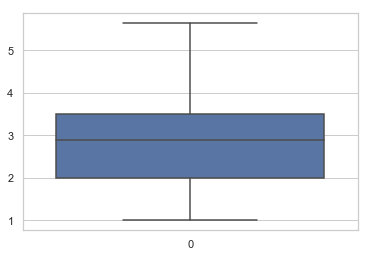

In [30]:
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=tip);

In [31]:
tip

array([1.01      , 1.66      , 3.5       , 3.31      , 3.61      ,
       4.71      , 2.        , 3.12      , 1.96      , 3.23      ,
       1.71      , 5.        , 1.57      , 3.        , 3.02      ,
       3.92      , 1.67      , 3.71      , 3.5       , 3.35      ,
       4.08      , 2.75      , 2.23      , 2.99827869, 3.18      ,
       2.34      , 2.        , 2.        , 4.3       , 3.        ,
       1.45      , 2.5       , 3.        , 2.45      , 3.27      ,
       3.6       , 2.        , 3.07      , 2.31      , 5.        ,
       2.24      , 2.54      , 3.06      , 1.32      , 5.6       ,
       3.        , 5.        , 2.99827869, 2.05      , 3.        ,
       2.5       , 2.6       , 5.2       , 1.56      , 4.34      ,
       3.51      , 3.        , 1.5       , 1.76      , 2.99827869,
       3.21      , 2.        , 1.98      , 3.76      , 2.64      ,
       3.15      , 2.47      , 1.        , 2.01      , 2.09      ,
       1.97      , 3.        , 3.14      , 5.        , 2.2    

### Agora, a coluna size (tamanho):

In [32]:
size = np.array(tips['size'])

**1º Passo -** Encontrar o valor da média dos dados:

In [33]:
media = np.mean(size, axis=0) 
media

2.569672131147541

**2º Passo -** Encontrar o valor do desvio padrão dos dados:

In [34]:
desvio_padrao = np.std(size, axis=0) #Somente 1 coluna = axis 0
desvio_padrao

0.9491488287193913

- Definição da fronteira menor: Valor mínimo permitido

In [35]:
fronteira_menor = (media - (2 * desvio_padrao))
fronteira_menor

0.6713744737087584

- Definição da fronteira maior: Valor máximo permitido

In [36]:
fronteira_maior = (media + (2 * desvio_padrao))
fronteira_maior

4.467969788586323

Vamos quantificar agora os valores que estão abaixo da fronteira menor:

In [37]:
print('Quantidade de valores abaixo da fronteira menor: {}'.format(len(size[size < fronteira_menor])))

Quantidade de valores abaixo da fronteira menor: 0


Vamos quantidicar os valores que estão acima da fronteira maior:

In [38]:
print('Quantidade de valores acima da fronteira maior: {}'.format(len(size[size > fronteira_maior])))

Quantidade de valores acima da fronteira maior: 9


In [39]:
# Cálculo da média
media = np.mean(size)
media

2.569672131147541

In [40]:
# Preenchimento dos valores maiores que a fronteira_maior com a média
size[size > fronteira_maior] = media

In [41]:
# Atualizar no dataset
tips['size'] = size

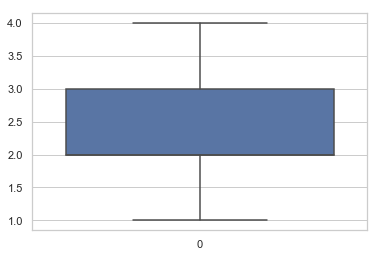

In [42]:
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=size);

In [43]:
size

array([2, 3, 3, 2, 4, 4, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 3, 3, 3, 3, 2, 2,
       2, 4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2,
       4, 2, 2, 4, 3, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 4, 3, 3,
       2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 1, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 3, 2, 3, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 4,
       4, 2, 2, 4, 2, 4, 4, 2, 3, 2, 2, 3, 2, 4, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 3, 4, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 2, 3, 2, 2, 2, 4, 3, 3, 4, 2, 2, 3, 4, 4, 2, 3, 2, 2, 2, 2, 4,
       2, 2, 1, 3, 2, 2, 2, 4, 2, 2, 4, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 2], dtype=int64)

Vamos exibir agora o boxplot de todos os valores juntos:

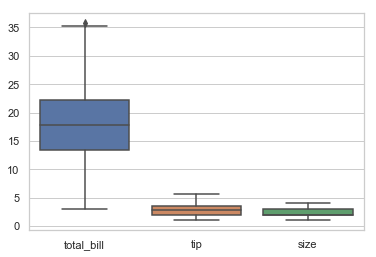

In [46]:
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=tips);